<a href="https://colab.research.google.com/github/prateetisaran/GalaxyZoo/blob/main/Galaxy_Zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data from Kaggle

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

mkdir: cannot create directory ‘/root/.kaggle’: File exists
galaxy-zoo-the-galaxy-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip galaxy-zoo-the-galaxy-challenge.zip -d data

Archive:  galaxy-zoo-the-galaxy-challenge.zip
replace data/all_ones_benchmark.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/all_ones_benchmark.zip  
replace data/all_zeros_benchmark.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/all_zeros_benchmark.zip  
  inflating: data/central_pixel_benchmark.zip  
  inflating: data/images_test_rev1.zip  
  inflating: data/images_training_rev1.zip  
  inflating: data/training_solutions_rev1.zip  


In [ ]:
! unzip /content/data/central_pixel_benchmark.zip -d /content/drive/MyDrive/Extended_Essay/

Archive:  /content/data/central_pixel_benchmark.zip
  inflating: /content/drive/MyDrive/Extended_Essay/central_pixel_benchmark.csv  


In [ ]:
! unzip /content/data/all_ones_benchmark.zip -d /content/drive/MyDrive/Extended_Essay/

Archive:  /content/data/all_ones_benchmark.zip
  inflating: /content/drive/MyDrive/Extended_Essay/all_ones_benchmark.csv  


In [ ]:
! unzip /content/data/all_zeros_benchmark.zip  -d /content/drive/MyDrive/Extended_Essay/

Archive:  /content/data/all_zeros_benchmark.zip
  inflating: /content/drive/MyDrive/Extended_Essay/all_zeros_benchmark.csv  


In [ ]:
! unzip /content/data/images_training_rev1.zip -d /content/drive/MyDrive/Extended_Essay/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Extended_Essay/images_training_rev1/926425.jpg  
  inflating: /content/drive/MyDrive/Extended_Essay/images_training_rev1/926426.jpg  
  inflating: /content/drive/MyDrive/Extended_Essay/images_training_rev1/926435.jpg  
  inflating: /content/drive/MyDrive/Extended_Essay/images_training_rev1/926446.jpg  
  inflating: /content/drive/MyDrive/Extended_Essay/images_training_rev1/926448.jpg  
  inflating: /content/drive/MyDrive/Extended_Essay/images_training_rev1/926453.jpg  
  inflating: /content/drive/MyDrive/Extended_Essay/images_training_rev1/926462.jpg  
  inflating: /content/drive/MyDrive/Extended_Essay/images_training_rev1/926478.jpg  
  inflating: /content/drive/MyDrive/Extended_Essay/images_training_rev1/926480.jpg  
  inflating: /content/drive/MyDrive/Extended_Essay/images_training_rev1/926484.jpg  
  inflating: /content/drive/MyDrive/Extended_Essay/images_training_rev1/926488.jpg  
  inflating: /

In [ ]:
! unzip /content/data/training_solutions_rev1.zip -d /content/drive/MyDrive/Extended_Essay/

Archive:  /content/data/training_solutions_rev1.zip
  inflating: /content/drive/MyDrive/Extended_Essay/training_solutions_rev1.csv  


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Dec  6 17:40:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    53W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


# Installs and Packages

In [ ]:
import tensorflow
import pandas as pd
import os
import keras
import tensorflow
from IPython.display import Image, display
from tensorflow.keras.applications import ResNet101, ResNet101V2, DenseNet121
from tensorflow.keras.layers import Input, Flatten, Dense, Concatenate, Multiply
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.activations import softmax, sigmoid
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
import random
import h5py
from collections import defaultdict
from PIL import ImageFont
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import shutil
import csv

In [ ]:
!pip install session-info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 3.1 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8046 sha256=162a1922763e3e5f4d8d0c2e2e660e91ddd4f876216733044e1aa26e20c3e9de
  Stored in directory: /root/.cache/pip/wheels/5c/1b/4d/111d73980c5c6a8e5e5905a19eccc34296cb359cac54c6c5b9
Successfully built session-info


In [ ]:
import tensorflow
import pandas as pd
import os
import keras
import tensorflow
from IPython.display import Image, display
from tensorflow.keras.applications import ResNet101, ResNet101V2, DenseNet121
from tensorflow.keras.layers import Input, Flatten, Dense, Concatenate, Multiply
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.activations import softmax, sigmoid
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
import random
import h5py
from collections import defaultdict
from PIL import ImageFont
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import shutil
import csv

In [ ]:
import session_info
session_info.show()

# Dataset Creation

In [ ]:
test_split = 0.15 #@param {type:"number"}
val_split = 0.15 #@param {type:"number"}
imsize = 120 #@param {type:"number"}
solutions = pd.read_csv('/content/drive/MyDrive/Extended_Essay/training_solutions_rev1.csv')
batchsize = 50 #@param {type:"number"}
prop = 1.00 #@param {type:"number"}

create_again = False #@param{type:"boolean"}

## Exploring

### Labels

In [ ]:
#solutions.head()

In [ ]:
#solutions.info()

### Images

#### Checking for all images

In [ ]:
#nots = []

In [ ]:
"""
for x in list(solutions.iloc[:,0]):
  if not os.path.isfile(f'/content/drive/MyDrive/Extended_Essay/images_training_rev1/{x}.jpg'):
    if x not in nots:
      nots.append(x)
"""

In [ ]:
#if len(nots) == 0:
  #print("All Files Exist!")

#### Visualizing the Images

In [ ]:
"""filenames = list(solutions.iloc[:,0])
i = 30 #@param{type:"integer"}
img = Image.open(f'/content/drive/MyDrive/Extended_Essay/images_training_rev1/{filenames[i]}.jpg')
img16 = img.resize((160, 160))
img16 = np.array(img16)
plt.imshow(img16)"""

In [ ]:
"""img12 = img.resize((120, 120))
img12 = np.array(img12)
plt.imshow(img12)"""

### A Data Point:

In [ ]:
"""
filenames = list(solutions.iloc[:,0])
i = 50 #@param{type:"integer"}
img = Image.open(f'/content/drive/MyDrive/Extended_Essay/images_training_rev1/{filenames[i]}.jpg')
img = img.resize((120, 120))
img = np.array(img)
plt.imshow(img)

sol = solutions.iloc[i]
len(list(dict(sol).keys()))

sol
"""

## Produce Dataset

In [ ]:
if create_again:
  dates = list(solutions.iloc[:,0])
  random.seed(10)
  random.shuffle(dates)
  ld = int(len(dates) * prop)
  test_num = int(test_split*(ld))
  val_num = int(test_split*(ld))

  test_dates = dates[0:test_num]
  val_dates = dates[test_num: test_num + val_num]
  train_dates = dates[val_num + test_num: ld]


### Code

#### Functions to Create

In [ ]:
solutions = solutions.set_index('GalaxyID')
if create_again:
  Y_train_dat = solutions.loc[train_dates]
  Y_test_dat = solutions.loc[test_dates]
  Y_val_dat = solutions.loc[val_dates]

In [ ]:
def create_img_dataset(list_inp):
  c = 0
  for i in list_inp:

    img = Image.open(f'/content/drive/MyDrive/Extended_Essay/images_training_rev1/{i}.jpg')
    img = img.resize((imsize, imsize))
    img = np.array(img)
    img = np.expand_dims(img, 0)

    if c ==0:
      output_arr = img
    else:
      output_arr = np.vstack((output_arr, img))
    c+= 1
  return output_arr

In [ ]:
def create_img_dataset2(list_inp):
  l = len(list_inp)
  output_arr = np.zeros((int(l),imsize,imsize,3), dtype="float32")
  for i in range(int(l)):
    x = list_inp[i]

    img = Image.open(f'/content/drive/MyDrive/Extended_Essay/images_training_rev1/{x}.jpg')
    img = img.resize((imsize, imsize))
    img = np.array(img)
    img = np.expand_dims(img, 0)

    output_arr[i] = img

    if i%200 ==0:
      print(f"{i} done")
  return output_arr

In [ ]:
def WriteH5file(data, filename, dataset = 'main'):

    with h5py.File(filename, 'w') as hf:
        hf.create_dataset(dataset, data=data, compression='gzip')

In [ ]:
def ReadH5file(filename, dataset = 'main'):
    """
    Read an h5 file from disk

    @param filename: location of h5 file
    @param dataset: location within file (default is main)
    """
    with h5py.File(filename, 'r') as hf:
        data = np.array(hf[dataset])

    return data

#### Actually Creating Again

In [ ]:
if create_again:
  #X_train = create_img_dataset2(train_dates)
  #WriteH5file(X_train,'/content/drive/MyDrive/Extended_Essay/X_train')
  X_test = create_img_dataset2(test_dates)
  WriteH5file(X_test,'/content/drive/MyDrive/Extended_Essay/X_test')
  X_val = create_img_dataset2(val_dates)
  WriteH5file(X_val,'/content/drive/MyDrive/Extended_Essay/X_val')

In [ ]:
if create_again:
  Y_train = Y_train_dat.to_numpy()
  Y_test = Y_test_dat.to_numpy()
  Y_val = Y_val_dat.to_numpy()

In [ ]:
if create_again:
  WriteH5file(Y_train,'/content/drive/MyDrive/Extended_Essay/Y_train')
  WriteH5file(Y_test,'/content/drive/MyDrive/Extended_Essay/Y_test')
  WriteH5file(Y_val,'/content/drive/MyDrive/Extended_Essay/Y_val')

#### Reading Files

In [ ]:
if not create_again:
  X_train = ReadH5file('/content/drive/MyDrive/Extended_Essay/X_train')
  Y_train = ReadH5file('/content/drive/MyDrive/Extended_Essay/Y_train')
  X_val = ReadH5file('/content/drive/MyDrive/Extended_Essay/X_val')
  Y_val = ReadH5file('/content/drive/MyDrive/Extended_Essay/Y_val')
  X_test = ReadH5file('/content/drive/MyDrive/Extended_Essay/X_test')
  Y_test = ReadH5file('/content/drive/MyDrive/Extended_Essay/Y_test')

In [ ]:
X_train = X_train.astype(int)
X_val = X_val.astype(int)
X_test = X_test.astype(int)

### Play Around and Verify

In [ ]:
#100801 in test_dates

In [ ]:
#test_dates.index(100801)

In [ ]:
#trial = X_test.astype(int)

In [ ]:
#plt.imshow(trial[1062])

In [ ]:
#Y_test[1062]

### Vectorize

In [ ]:
# class GalaxyData(keras.utils.Sequence):
#     """Helper to iterate over the data (as Numpy arrays)."""

#     def __init__(self, batch_size, img_size, input_img_paths):
#         self.batch_size = batch_size
#         self.img_size = img_size
#         self.input_img_paths = input_img_paths

#     def __len__(self):
#         return len(self.input_img_paths) // self.batch_size

#     def __getitem__(self, idx):
#         """Returns tuple (input, target) correspond to batch #idx."""
#         i = idx * self.batch_size
#         batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]

#         x = np.zeros((self.batch_size,) + (self.img_size,)+ (self.img_size,) + (3,), dtype="float32")

#         for j, path in enumerate(batch_input_img_paths):
#             img = load_img(f'/content/drive/MyDrive/Extended_Essay/images_training_rev1/{path}.jpg', target_size=(self.img_size, self.img_size))
#             x[j] = img
#         y = []
#         for path in batch_input_img_paths:
#             y_arr = list(solutions.loc[[path]])
#             y.append(y_arr)
#         np.array(y)
#         return x, y

In [ ]:
# train_gen = GalaxyData(batchsize, imsize, train_dates)
# val_gen = GalaxyData(batchsize, imsize, val_dates)

# Model

In [ ]:
Network_Base = "DenseNet" #@param ["ResNet", "DenseNet","EfficientNet"]
Depth = "Shallow" #@param ["Deep", "Medium", "Shallow"]
Include_Decision_Tree = False #@param {type:"boolean"}
trial = "Trial 4" #@param {type:"string"}
trial = trial + Network_Base + Depth + str(Include_Decision_Tree)
epochs = 40 #@param {type:"integer"}

## Defining Models

### Defining Convolutional Layers

In [ ]:
if Network_Base == "ResNet":
  if Depth == "Deep":
    conv = ResNet152(include_top = False, weights = 'imagenet', pooling ='avg', input_shape = (imsize,imsize,3))
  elif Depth == "Medium":
    conv = ResNet101(include_top = False, weights = 'imagenet', pooling ='avg', input_shape = (imsize,imsize,3))
  else:
    conv = ResNet50(include_top = False, weights = 'imagenet', pooling ='avg', input_shape = (imsize,imsize,3))

elif Network_Base == "DenseNet":
  if Depth == "Shallow":
    conv = DenseNet121(include_top = False, weights = 'imagenet', pooling ='avg', input_shape = (imsize,imsize,3))
  elif Depth == "Medium":
    conv = DenseNet169(include_top = False, weights = 'imagenet', pooling ='avg', input_shape = (imsize,imsize,3))
  else:
    conv = DenseNet201(include_top = False, weights = 'imagenet', pooling ='avg', input_shape = (imsize,imsize,3))




171446536/171446536 [==============================] - 1s 0us/step


In [ ]:
if Network_Base == "ResNet":
  if Depth == "Shallow":
    conv = ResNet50(include_top = False, weights = 'imagenet', pooling ='avg', input_shape = (imsize,imsize,3))
  elif Depth == "Deep":
    conv = ResNet101(include_top = False, weights = 'imagenet', pooling ='avg', input_shape = (imsize,imsize,3))

elif Network_Base == "DenseNet":
  conv = DenseNet121(include_top = False, weights = 'imagenet', pooling ='avg', input_shape = (imsize,imsize,3))




171446536/171446536 [==============================] - 1s 0us/step


In [ ]:
conv.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 126, 126, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 60, 60, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 60, 60, 64)   256         ['conv1_conv[0][0]']     

### Defining Output Layer

In [ ]:


if Include_Decision_Tree:
  inputs = Input(shape=(imsize, imsize, 3))
  x = conv(inputs)
  x = Flatten()(x)
  x = Dense(37, kernel_initializer=RandomNormal(mean=0., stddev=1.))(x)
  x01 = softmax(x[:,:3])                             # Task01 probability = 1
  x02 = Multiply()([softmax(x[:, 3: 5]), x01[:,1]])  # Task02 probability depends on 01==1
  x03 = Multiply()([softmax(x[:, 5: 7]), x02[:,1]])  # Task03 probability depends on 02==1
  x04 = Multiply()([softmax(x[:, 7: 9]), x02[:,1]])  # Task04 probability depends on 02==1
  x05 = Multiply()([softmax(x[:, 9:13]), x02[:,1]])  # Task05 probability depends on 02==1
  x06 = Multiply()([softmax(x[:,13:15]), 1-x01[:,2]])# Task06 probability = 1 depends on 01!=2
  x07 = Multiply()([softmax(x[:,15:18]), x01[:,0]])  # Task07 probability depends on 01==0
  x08 = Multiply()([softmax(x[:,18:25]), x06[:,0]])  # Task08 probability depends on 06==0
  x09 = Multiply()([softmax(x[:,25:28]), x02[:,0]])  # Task09 probability depends on 02==0
  x10 = Multiply()([softmax(x[:,28:31]), x04[:,0]])  # Task10 probability depends on 04==0
  x11 = Multiply()([softmax(x[:,31:37]), x04[:,0]])  # Task11 probability depends on 04==0

  outputs = Concatenate(axis=1)([x01, x02, x03, x04, x05, x06, x07, x08, x09, x10, x11])

  model = Model(inputs=inputs, outputs=outputs)

if not Include_Decision_Tree:
  model = Sequential()
  model.add(conv)
  model.add(Dense(37, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 dense_3 (Dense)             (None, 37)                37925     
                                                                 
Total params: 7,075,429
Trainable params: 6,991,781
Non-trainable params: 83,648
_________________________________________________________________


### Utils

In [ ]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()

callbacks = keras.callbacks.ModelCheckpoint(f'/content/drive/MyDrive/Extended_Essay/models/{trial}_{{epoch:02d}}.h5', monitor = 'val_loss', mode = 'min', save_best_only=True)



## Train

In [ ]:
loss = keras.losses.MeanSquaredError()
model.compile(optimizer="rmsprop", loss=loss, metrics = [RootMeanSquaredError(), Accuracy()])

# Train the model, doing validation at the end of each epoch.

history = model.fit(x = X_train, y = Y_train, epochs=epochs, validation_data=(X_val, Y_val), callbacks=[callbacks,time_callback], batch_size = batchsize)
model.save(f'/content/drive/MyDrive/Extended_Essay/models/{trial}_final.h5')

Epoch 1/40
863/863 [==============================] - 111s 97ms/step - loss: 0.0827 - root_mean_squared_error: 0.2875 - accuracy: 0.3233 - val_loss: 0.0950 - val_root_mean_squared_error: 0.3083 - val_accuracy: 0.4272
Epoch 2/40
863/863 [==============================] - 78s 91ms/step - loss: 0.0780 - root_mean_squared_error: 0.2792 - accuracy: 0.3466 - val_loss: 0.0790 - val_root_mean_squared_error: 0.2811 - val_accuracy: 0.3845
Epoch 3/40
863/863 [==============================] - 78s 91ms/step - loss: 0.0662 - root_mean_squared_error: 0.2573 - accuracy: 0.3458 - val_loss: 0.0631 - val_root_mean_squared_error: 0.2512 - val_accuracy: 0.3423
Epoch 4/40
863/863 [==============================] - 77s 89ms/step - loss: 0.0643 - root_mean_squared_error: 0.2535 - accuracy: 0.3464 - val_loss: 0.0631 - val_root_mean_squared_error: 0.2512 - val_accuracy: 0.3423
Epoch 5/40
863/863 [==============================] - 77s 90ms/step - loss: 0.0647 - root_mean_squared_error: 0.2543 - accuracy: 0.3460

# Evaluation

## Functions

In [ ]:
def print_data(save):

  hs = history.history
  opt_val_loss = min(hs['val_loss'])
  best_epoch = hs['val_loss'].index(opt_val_loss) + 1

  ts = time_callback.times
  opt_time = 0
  for a in range(best_epoch):
    opt_time+= ts[a]

  total_time = 0
  for a in ts:
    total_time+=a

  opt_val_accuracy = hs['val_accuracy'][best_epoch-1]


  if best_epoch <10: num = '0'+str(best_epoch)
  else: num = str(best_epoch)

  best_model = load_model(f'/content/drive/MyDrive/Extended_Essay/models/{trial}_{num}.h5')

  for item in os.listdir('/content/drive/MyDrive/Extended_Essay/models'):
    if trial in item:
      if item != f'{trial}_{num}.h5' and item != f'{trial}_final.h5':
        shutil.move(f'/content/drive/MyDrive/Extended_Essay/models/{item}', f'/content/drive/MyDrive/Extended_Essay/Extras/{item}')



  #evaluate = loss,RMSE,Accuracy
  tests = best_model.evaluate(X_test,Y_test)
  vals =  best_model.evaluate(X_val,Y_val)
  trains = [hs['loss'][best_epoch-1], hs['root_mean_squared_error'][best_epoch-1],hs['accuracy'][best_epoch-1]]

  tests_f = model.evaluate(X_test,Y_test)
  vals_f =  model.evaluate(X_val,Y_val)
  trains_f = [hs['loss'][-1], hs['root_mean_squared_error'][-1],hs['accuracy'][-1]]

  print("GENERAL")
  print("_________________")
  print()

  print("Network Base")
  print(Network_Base)
  print()

  print("Network Depth")
  print(Depth)
  print()

  print("Used Decision Tree?")
  print(Include_Decision_Tree)
  print()


  print("Epochs before optimal val loss")
  print(best_epoch)
  print()

  print("Time before optimal val loss")
  print(opt_time)
  print()

  print("Time for complete training")
  print(total_time)
  print()
  print()

  print("OPTIMAL")
  print("_________________")
  print()
  print("Optimal Val Loss")
  print(vals[0])
  print()
  print("Optimal Val Accuracy")
  print(vals[2])
  print()
  print("Optimal Val RMSE")
  print(vals[1])
  print()

  print("Optimal Test Loss")
  print(tests[0])
  print()
  print("Optimal Test Accuracy")
  print(tests[2])
  print()
  print("Optimal Test RMSE")
  print(tests[1])
  print()

  print("Optimal Train Loss")
  print(trains[0])
  print()
  print("Optimal Train Accuracy")
  print(trains[2])
  print()
  print("Optimal Train RMSE")
  print(trains[1])
  print()
  print()

  print("FINAL")
  print("_________________")
  print()



  print("Final Val Loss")
  print(vals_f[0])
  print()
  print("Final Val Accuracy")
  print(vals_f[2])
  print()
  print("Final Val RMSE")
  print(vals_f[1])
  print()

  print("Final Test Loss")
  print(tests_f[0])
  print()
  print("Final Test Accuracy")
  print(tests_f[2])
  print()
  print("Final Test RMSE")
  print(tests_f[1])
  print()

  print("Final Train Loss")
  print(trains_f[0])
  print()
  print("Final Train Accuracy")
  print(trains_f[2])
  print()
  print("Final Train RMSE")
  print(trains_f[1])
  print()


  ep = range(1,epochs+1)

  plt.plot(ep,hs['accuracy'])
  plt.plot(ep,hs['val_accuracy'])
  plt.axvline(x = best_epoch, color = 'b', label = 'stopped training here')
  plt.plot()
  plt.title(f'{trial} model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  if save: plt.savefig(f'/content/drive/MyDrive/Extended_Essay/Results/Graphs/{trial}_accuracy')
  plt.show()

  # summarize history for loss
  plt.plot(ep,hs['loss'])
  plt.plot(ep,hs['val_loss'])
  plt.axvline(x = best_epoch, color = 'b', label = 'stopped training here')
  plt.title(f'{trial} model loss')
  plt.ylabel('loss')
  #plt.ylim(0,5)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  if save: plt.savefig(f'/content/drive/MyDrive/Extended_Essay/Results/Graphs/{trial}_loss')
  plt.show()

  # summarize history for RMSE
  plt.plot(ep,hs['root_mean_squared_error'])
  plt.plot(ep,hs['val_root_mean_squared_error'])
  plt.axvline(x = best_epoch, color = 'b', label = 'stopped training here')
  plt.title(f'{trial} model RMSE')
  plt.ylabel('RMSE')
  #plt.ylim(0,5)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  if save: plt.savefig(f'/content/drive/MyDrive/Extended_Essay/Results/Graphs/{trial}_rmse')
  plt.show()

  if save:

    row = [trial, Network_Base,Depth, Include_Decision_Tree, best_epoch, opt_time, total_time]+ trains + tests + vals + trains_f + tests_f + vals_f

    with open('/content/drive/MyDrive/Extended_Essay/Results/results.csv','a') as f:
      writer = csv.writer(f)
      writer.writerow(row)



In [ ]:
columns= ['Trial Name','Network Base','Depth','Decision Tree','Epochs before Optimal','Time Before Optimal','Total Training Time',
          'Optimal Train Loss', 'Optimal Train RMSE','Optimal Train Accuracy',
          'Optimal Test Loss', 'Optimal Test RMSE', 'Optimal Test Accuracy',
          'Optimal Val Loss', 'Optimal Val RMSE', 'Optimal Val Accuracy',
          'Final Train Loss', 'Final Train RMSE','Final Train Accuracy',
          'Final Test Loss', 'Final Test RMSE','Final Test Accuracy',
          'Final Val Loss', 'Final Val RMSE','Final Val Accuracy',]

if not os.path.exists('/content/drive/MyDrive/Extended_Essay/Results/results.csv'):
  with open('/content/drive/MyDrive/Extended_Essay/Results/results.csv','w') as f:
    writer = csv.DictWriter(f, fieldnames = columns)
    writer.writeheader()

## Results

289/289 [==============================] - 6s 21ms/step - loss: 0.0584 - root_mean_squared_error: 0.2417 - accuracy: 0.3405
GENERAL
_________________

Network Base
DenseNet

Network Depth
Shallow

Used Decision Tree?
True

Epochs before optimal val loss
15

Time before optimal val loss
1196.8918771743774

Time for complete training
3125.809650182724


OPTIMAL
_________________

Optimal Val Loss
0.057459861040115356

Optimal Val Accuracy
0.34132009744644165

Optimal Val RMSE
0.23970787227153778

Optimal Test Loss
0.058119259774684906

Optimal Test Accuracy
0.3424467146396637

Optimal Test RMSE
0.24107936024665833

Optimal Train Loss
0.059077296406030655

Optimal Train Accuracy
0.34437859058380127

Optimal Train RMSE
0.24305810034275055


FINAL
_________________

Final Val Loss
0.05840209499001503

Final Val Accuracy
0.3405446410179138

Final Val RMSE
0.24166524410247803

Final Test Loss
0.058917608112096786

Final Test Accuracy
0.3414459228515625

Final Test RMSE
0.24272951483726501

Fi

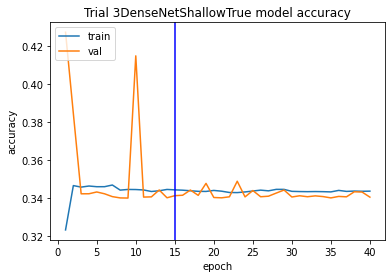

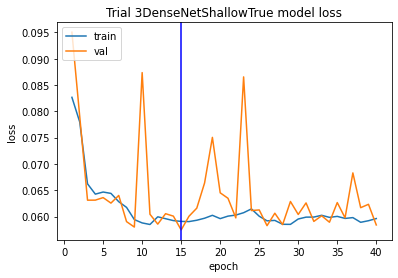

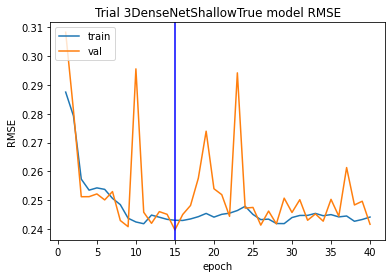

In [ ]:
print_data(save=True)

In [ ]:
pd.read_csv('/content/drive/MyDrive/Extended_Essay/Results/results.csv')

,Trial Name,Network Base,Depth,Decision Tree,Epochs before Optimal,Time Before Optimal,Total Training Time,Optimal Train Loss,Optimal Train RMSE,Optimal Train Accuracy,...,Optimal Val Accuracy,Final Train Loss,Final Train RMSE,Final Train Accuracy,Final Test Loss,Final Test RMSE,Final Test Accuracy,Final Val Loss,Final Val RMSE,Final Val Accuracy
0,Trial 1ResNetShallowFalse,ResNet,Shallow,False,40,1952.866220,1952.866220,0.001016,0.031873,0.000000,...,0.000000,0.001016,0.031873,0.000000,0.008809,0.093857,0.000000,0.008888,0.094275,0.000000
1,Trial 2ResNetShallowTrue,ResNet,Shallow,True,30,1426.152374,1877.392994,0.008017,0.089539,0.010564,...,0.002297,0.005398,0.073470,0.010053,0.011356,0.106563,0.004732,0.011078,0.105253,0.004261
2,Trial 3DenseNetShallowTrue,DenseNet,Shallow,True,14,1120.201391,3146.211351,0.078629,0.280409,0.351458,...,0.344006,0.079105,0.281257,0.350531,0.079497,0.281952,0.349862,0.078629,0.280408,0.349007
3,Trial 4DenseNetShallowFalse,DenseNet,Shallow,False,18,1410.225750,3083.480200,0.006408,0.080048,0.012107,...,0.003260,0.003343,0.057820,0.012672,0.009790,0.098943,0.003994,0.009888,0.099436,0.005457
4,Trial 4DenseNetShallowFalse,DenseNet,Shallow,False,18,1410.225750,3083.480200,0.006408,0.080048,0.012107,...,0.003260,0.003343,0.057820,0.012672,0.009790,0.098943,0.003994,0.009888,0.099436,0.005457
5,Trial 5ResNetMediumTrue,ResNet,Medium,True,22,1823.030285,3283.688483,0.007670,0.087576,0.010693,...,0.000056,0.005536,0.074402,0.010150,0.012940,0.113754,0.010611,0.012828,0.113261,0.009706
6,Trial 6ResNetMediumFalse,ResNet,Medium,False,39,3122.653847,3201.345718,0.001082,0.032894,0.000000,...,0.000000,0.001046,0.032349,0.000000,0.009241,0.096128,0.000000,0.009192,0.095877,0.000000
7,Trial 3DenseNetShallowTrue,DenseNet,Shallow,True,15,1196.891877,3125.809650,0.059077,0.243058,0.344379,...,0.341320,0.059619,0.244171,0.343700,0.058918,0.242730,0.341446,0.058402,0.241665,0.340545


## Comparing Models

In [ ]:
i = 1062 #@param {type:"integer"}
ex = np.expand_dims(X_test[i],0)

In [ ]:
Trial1 = load_model('/content/drive/MyDrive/Extended_Essay/models/Trial 1ResNetShallowFalse_40.h5')
Trial2 = load_model('/content/drive/MyDrive/Extended_Essay/models/Trial 2ResNetShallowTrue_30.h5')
Trial3 = load_model('/content/drive/MyDrive/Extended_Essay/models/Trial 3DenseNetShallowTrue_14.h5')
Trial4 = load_model('/content/drive/MyDrive/Extended_Essay/models/Trial 4DenseNetShallowFalse_18.h5')
Trial5 = load_model('/content/drive/MyDrive/Extended_Essay/models/Trial 5ResNetMediumTrue_22.h5')
Trial6 = load_model('/content/drive/MyDrive/Extended_Essay/models/Trial 6ResNetMediumFalse_39.h5')

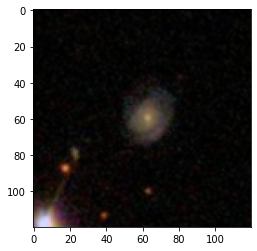

In [ ]:
plt.imshow(ex[0])

In [ ]:
Y_test[i]

array([0.034997  , 0.965003  , 0.        , 0.        , 0.965003  ,
       0.25186964, 0.71313336, 0.87516219, 0.08984081, 0.        ,
       0.55101671, 0.41398629, 0.        , 0.19804   , 0.80196   ,
       0.0069994 , 0.0279976 , 0.        , 0.039608  , 0.        ,
       0.039608  , 0.079216  , 0.        , 0.039608  , 0.        ,
       0.        , 0.        , 0.        , 0.59861093, 0.27655125,
       0.        , 0.09198392, 0.23039782, 0.09198392, 0.        ,
       0.1384139 , 0.32238174])

In [ ]:
t1 = Trial1.predict(ex)
t1

1/1 [==============================] - 1s 830ms/step


array([[1.23429522e-01, 8.70618045e-01, 1.06297703e-02, 1.80212129e-02,
        8.37824583e-01, 1.02111638e-01, 7.01680899e-01, 6.17991030e-01,
        2.24516079e-01, 1.95760597e-02, 5.31871200e-01, 2.87351131e-01,
        3.75225209e-02, 3.40083539e-01, 6.59575939e-01, 6.70533329e-02,
        6.86668679e-02, 1.04402390e-03, 1.22082330e-01, 3.07258703e-02,
        1.16570801e-01, 1.21251546e-01, 2.05328707e-02, 7.52796838e-03,
        2.98033282e-03, 1.19896177e-02, 6.03860186e-04, 4.07692418e-03,
        3.34832907e-01, 2.64160573e-01, 6.88311160e-02, 2.03486159e-01,
        1.12336285e-01, 2.51849949e-01, 2.43532881e-02, 2.08391771e-02,
        2.10282117e-01]], dtype=float32)

In [ ]:
t2 = Trial2.predict(ex)
t2

1/1 [==============================] - 1s 946ms/step


array([[1.2175249e-01, 8.7301743e-01, 5.2300226e-03, 1.7266169e-02,
        8.5575122e-01, 8.6750858e-02, 7.6900035e-01, 6.7996532e-01,
        1.7578587e-01, 4.7912192e-02, 5.0755864e-01, 2.5486499e-01,
        4.5415394e-02, 4.0949625e-01, 5.8527368e-01, 5.3725582e-02,
        6.4677529e-02, 3.3493813e-03, 3.3430040e-02, 1.6673764e-02,
        9.9536948e-02, 1.3966259e-01, 7.3638000e-02, 4.4483572e-02,
        2.0713513e-03, 1.0706177e-02, 8.6937856e-04, 5.6906133e-03,
        2.9299840e-01, 3.1583542e-01, 7.1131431e-02, 8.5529312e-02,
        1.6077617e-01, 1.1862576e-01, 4.0646262e-02, 2.0684237e-02,
        2.5370356e-01]], dtype=float32)

In [ ]:
t3 = Trial3.predict(ex)
t3

1/1 [==============================] - 2s 2s/step


array([[1.00000000e+00, 0.00000000e+00, 6.02953125e-37, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.01931305e-24, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 4.46477183e-33, 8.26192474e-35, 2.92914822e-36,
        1.18718795e-33, 3.01931305e-24, 3.96037923e-36, 7.52315925e-34,
        1.06096998e-33, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]], dtype=float32)

In [ ]:
t4 = Trial4.predict(ex)
t4

1/1 [==============================] - 2s 2s/step


array([[1.70746699e-01, 8.18033338e-01, 1.10618854e-02, 1.44352363e-02,
        7.82905579e-01, 9.66287032e-02, 6.91695392e-01, 4.94159013e-01,
        3.34917963e-01, 1.14099896e-02, 3.33103508e-01, 4.20436502e-01,
        4.74275500e-02, 4.13811266e-01, 5.90049148e-01, 8.14699829e-02,
        6.69987723e-02, 7.38372211e-04, 1.50662720e-01, 3.38849053e-02,
        8.06368440e-02, 8.70307684e-02, 6.53477684e-02, 3.43094096e-02,
        2.15779454e-03, 1.29459426e-02, 1.12953642e-03, 1.73173496e-03,
        3.09269518e-01, 1.75968990e-01, 3.81372608e-02, 7.79165402e-02,
        1.22508518e-01, 5.35439178e-02, 1.48171075e-02, 1.16593447e-02,
        2.53249913e-01]], dtype=float32)

In [ ]:
t5 = Trial5.predict(ex)
t5

1/1 [==============================] - 2s 2s/step


array([[2.2174023e-01, 7.6902491e-01, 9.2348838e-03, 1.1256759e-02,
        7.5776815e-01, 1.0802703e-01, 6.4974111e-01, 6.0926878e-01,
        1.4849935e-01, 2.0406047e-02, 4.0644738e-01, 3.0058447e-01,
        3.0330291e-02, 2.1258660e-01, 7.7817845e-01, 1.3885470e-01,
        8.1587516e-02, 1.2980154e-03, 7.9330981e-02, 1.7855743e-02,
        4.3780956e-02, 2.6421864e-02, 3.1795762e-02, 1.3062166e-02,
        3.3911146e-04, 7.5810999e-03, 3.5939977e-04, 3.3162595e-03,
        3.6155361e-01, 1.9799329e-01, 4.9721882e-02, 6.4811558e-02,
        2.0937736e-01, 5.2906964e-02, 1.8127628e-02, 2.4449207e-02,
        2.3959604e-01]], dtype=float32)

In [ ]:
t6 = Trial6.predict(ex)
t6

1/1 [==============================] - 2s 2s/step


array([[0.16770223, 0.82201684, 0.01156018, 0.01535837, 0.8103394 ,
        0.13670604, 0.66184616, 0.5890958 , 0.16938472, 0.02049706,
        0.4843135 , 0.3254556 , 0.01251611, 0.27079165, 0.7279859 ,
        0.05166527, 0.1033233 , 0.00197019, 0.14837277, 0.0228113 ,
        0.09368272, 0.05439546, 0.01759216, 0.00572937, 0.00144976,
        0.01163141, 0.00085045, 0.00234958, 0.34648567, 0.16681892,
        0.03272196, 0.09532376, 0.15717548, 0.07690474, 0.00753463,
        0.00720433, 0.20253052]], dtype=float32)

In [ ]:
for a in t6[0]:
  print(round(a,3))

0.168
0.822
0.012
0.015
0.81
0.137
0.662
0.589
0.169
0.02
0.484
0.325
0.013
0.271
0.728
0.052
0.103
0.002
0.148
0.023
0.094
0.054
0.018
0.006
0.001
0.012
0.001
0.002
0.346
0.167
0.033
0.095
0.157
0.077
0.008
0.007
0.203
